# Differential Equations in BCMB

There are a 

# Differential equations and rates

Biochemistry has _many_ differential equations.  Let's consider a zeroth-order reaction:

$\frac{d[C]}{dt} = -k$

Gives us the equation - where the rate at which a drug (or other substance) decays $\frac{d[C]}{dt}$ is dependent only on the constant $k$.  An example of a zeroth order reaction is the oxidation of ethanol in the human liver to acetaldehyde, catalyzed by alcohol dehydrogenase.  As long as there is a high enough amount of alcohol available, the reaction is limited only by how fast the enzyme can work (and the amount of enzyme available. 

If we integrate this, we can see that the concentration should behave like:

$C(t) = C_0 - kt$

With $C_0$ the initial amount of alcohol and $t$ as time. The resulting curve looks like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t=np.linspace(0,100, 101) #Here's my time values from 0 to 1000
k=5 #rate constant
C_0=1000 #inital amount of alcohol
C=C_0 - k*t

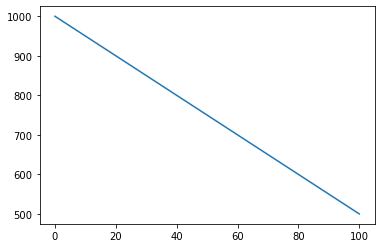

In [3]:
plt.plot(t, C)

Ok - so let's now consider a "first-order" rate equation, like either _exponential decay_ or _exponential growth_.

These rates generally follow:

$\frac{d[C]}{dt} = -k[C]$

Gives us the equation - where the rate at which a drug (or other substance) decays $\frac{d[C]}{dt}$ is dependent on the amount of the substance $[C]$ times a constant $k$. But . . . how do we solve this?  The rate of _change_ of the concentration is dependent _itself_ on the concentration.  Of course, if you've taken differential equations, you might know that the answer is:

$C(t)=C_0e^{-kt}$

But let's say we _don't_ know that.  What's another way to solve this?

We can use Euler's method (<https://en.wikipedia.org/wiki/Euler_method>).  This is a numerical method where you basically take _tiny_ little baby steps, estimating the rate at each time based on the concentration at that time, recalculating at each point.  Let me illustrate - let's start with an initial concentration of $C_0=1000$ and $k=0.05$.

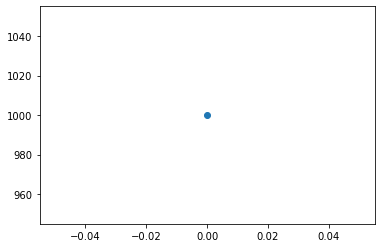

In [4]:
C=np.array([1000])
t=np.array([0])
k=0.05
plt.plot(t, C, '-o')

Now let's calculate $C$ at $t = 1$.  First we calculate the rate at $t=0$:

In [5]:
rate=np.array([-k*C[0]])
rate

array([-50.])

So the rate is $-500$ - let's now apply that rate from $t=0$ to calculate the concentration at $t=1$

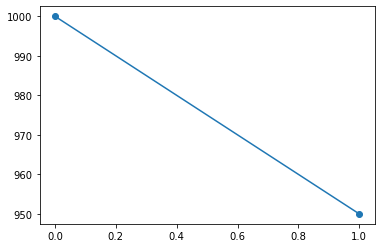

In [6]:
dt = 1 # The size of our time step is 1
t=np.append(t, t[0]+dt)
C=np.append(C, C[0]+dt*rate[0])
plt.plot(t, C, '-o')

So now at $t=1$ we have $C=50$. Let's repeat this now for $t=1$

In [7]:
rate=np.append(rate, -k*C[1])
rate

array([-50. , -47.5])

Ok - the rate is now $-47.5$.  Let's apply this.

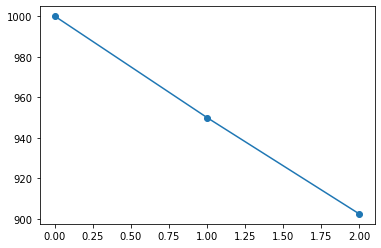

In [8]:
t=np.append(t, t[1]+dt)
C=np.append(C, C[1]+dt*rate[1])
plt.plot(t, C, '-o')

I see a pattern forming.  I bet I can do this with a for loop:

In [9]:
#Restart my values
C=np.array([1000])
t=np.array([0])
k=0.05
rate=np.array([-k*C[0]])
dt=1
num_points=int(100/dt)

In [10]:
for i in range(num_points):
    t=np.append(t, t[i]+dt)
    C=np.append(C, C[i]+dt*rate[i-1])
    rate=np.append(rate, -k*C[i])

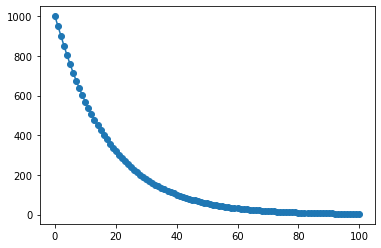

In [11]:
plt.plot(t, C, '-o')

And let's compare this _numerical_ solution to the _analytical_ solution

In [12]:
(-k*t)

array([-0.  , -0.05, -0.1 , -0.15, -0.2 , -0.25, -0.3 , -0.35, -0.4 ,
       -0.45, -0.5 , -0.55, -0.6 , -0.65, -0.7 , -0.75, -0.8 , -0.85,
       -0.9 , -0.95, -1.  , -1.05, -1.1 , -1.15, -1.2 , -1.25, -1.3 ,
       -1.35, -1.4 , -1.45, -1.5 , -1.55, -1.6 , -1.65, -1.7 , -1.75,
       -1.8 , -1.85, -1.9 , -1.95, -2.  , -2.05, -2.1 , -2.15, -2.2 ,
       -2.25, -2.3 , -2.35, -2.4 , -2.45, -2.5 , -2.55, -2.6 , -2.65,
       -2.7 , -2.75, -2.8 , -2.85, -2.9 , -2.95, -3.  , -3.05, -3.1 ,
       -3.15, -3.2 , -3.25, -3.3 , -3.35, -3.4 , -3.45, -3.5 , -3.55,
       -3.6 , -3.65, -3.7 , -3.75, -3.8 , -3.85, -3.9 , -3.95, -4.  ,
       -4.05, -4.1 , -4.15, -4.2 , -4.25, -4.3 , -4.35, -4.4 , -4.45,
       -4.5 , -4.55, -4.6 , -4.65, -4.7 , -4.75, -4.8 , -4.85, -4.9 ,
       -4.95, -5.  ])

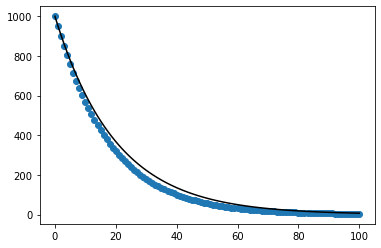

In [13]:
C_analytical=C[0]*np.exp(-k*t)

plt.plot(t, C, 'o')
plt.plot(t, C_analytical, 'k-')

It's . . . . not perfect, but it's pretty close! The reason the curve is inaccurate is because the rate _changes_ through that first $dt$, that first time interval.  If we took smaller intervals, it would get more accurate, but then it would also require more computation.  Let's see what happens with $dt=0.1$ and $dt=10$

For $dt=0.1$

In [14]:
#Restart my values
C_small=np.array([1000])
t_small=np.array([0])
k=0.05
rate_small=np.array([-k*C_small[0]])
dt_small=0.1
num_points=int(100/dt_small)

In [15]:
for i in range(num_points):
    t_small=np.append(t_small, t_small[i]+dt_small)
    C_small=np.append(C_small, C_small[i]+dt_small*rate_small[i-1])
    rate_small=np.append(rate_small, -k*C_small[i])

For $dt = 10$

In [23]:
#Restart my values
C_big=np.array([1000])
t_big=np.array([0])
k=0.05
rate_big=np.array([-k*C_big[0]])
dt_big=10
num_points=int(100/dt_big)

In [24]:
for i in range(num_points):
    t_big=np.append(t_big, t_big[i]+dt_big)
    C_big=np.append(C_big, C_big[i]+dt_big*rate_big[i-1])
    rate_big=np.append(rate_big, -k*C_big[i])

Now let's plot all 4 lines

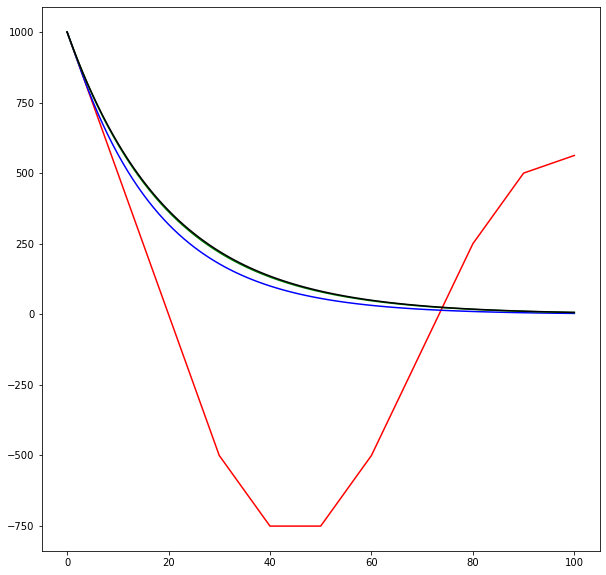

In [25]:
plt.figure(figsize=(10,10))
plt.plot(t_big, C_big, 'r-')
plt.plot(t, C, 'b-')
plt.plot(t_small, C_small, 'g-')
plt.plot(t, C_analytical, 'k-')


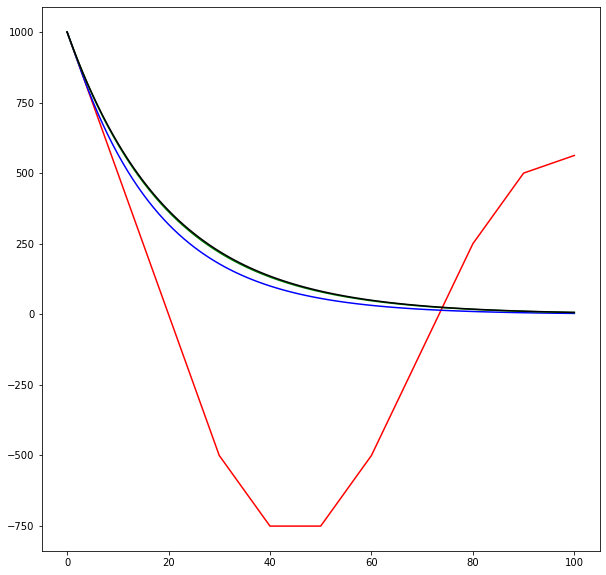

In [25]:
plt.figure(figsize=(10,10))
plt.plot(t_big, C_big, 'r-')
plt.plot(t, C, 'b-')
plt.plot(t_small, C_small, 'g-')
plt.plot(t, C_analytical, 'k-')


Ok - so if we take _too big_ a time step - it becomes illogical - going to less than zero concentration.  If we take a smaller time step, it has a better fit to the _true_ analytical solution.  So you always want to take the smallest time step that is logical.

All this said, it turns out . . . python can help you with this.  You don't have to make these for loops and solve it yourself each time!  Somewhat unsurprisingly, there are tools for it.   
We are going to first use `scipy`'s `integrate` package - specifically the `solve_ivp` command. Some documentation is here (<https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html#ordinary-differential-equations-odeint>) and here (<https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp>)

In [26]:
from scipy.integrate import solve_ivp

Let's set up for our same equation as before:

$\frac{d[C]}{dt} = -k[C]$

We have to tell solve_ivp about this equation.  We'll do this by defining the function like so:

In [27]:
def decay(t, C):
    k = 0.05
    rate = -k * C
    return rate

In [27]:
def decay(t, C):
    k = 0.05
    rate = -k * C
    return rate

Where `decay` is just the name of the function (like the name of any variable) and `(t, C)` tells you what information the function is getting passed, in this case **t**ime and **C**oncentration.

Now let's run the ode solver, using the same time range for our analytical solution above:

In [29]:
C_0

1000

In [31]:
C_0=[1000] #initial Condition
tspan = [0, 100] #Time span
C_solver = solve_ivp(decay, tspan, C_0)
C_solver

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   0.18205646,   2.00262102,  20.2082667 ,
        37.74669563,  55.32647256,  72.90369238,  90.48110377,
       100.        ])
 t_events: None
        y: array([[1000.        ,  990.93848243,  904.71884595,  364.2948101 ,
         151.6411218 ,   62.99218281,   26.17047676,   10.87257639,
           6.75515383]])
 y_events: None

So what does this output?  It looks like it tells us the times it actually used - notice that the times it used _do not_ have regular spacing - the `solve_ivp` solver uses a more sophisticated version of Euler's method (Runge-kutta 4-5) and an _adaptive_ step size.  Without getting into the math, it chooses the step size to minimize the error _and_ the number of steps it needs to take.

We _can_ force it to output values at certain points if we want like so:

In [35]:
C_0=[1000] #initial Condition
tspan = [0, 100] #Time span
output_times = np.linspace(0,100,101)
C_solver = solve_ivp(decay, tspan, C_0, t_eval=output_times)
C_solver

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])
 t_events: None
        y: array([[1000.        ,  951.2294224 ,  904.8374182 ,  860.68433615,
         818.64915883,  778.6441698 ,  740.5834705

Let's plot our original loop plot, the analytical plot, and this `solve_ivp` plot:

In [38]:
C_solver.y

array([[1000.        ,  951.2294224 ,  904.8374182 ,  860.68433615,
         818.64915883,  778.6441698 ,  740.58347051,  704.38298013,
         669.96043558,  637.2353915 ,  606.12922025,  576.56511194,
         548.46807438,  521.76493313,  496.38433148,  472.25673044,
         449.31440875,  427.49146287,  406.72380701,  386.9491731 ,
         368.10711079,  350.14992414,  333.05441556,  316.78501331,
         301.30633737,  286.58381186,  272.58366496,  259.27292901,
         246.61944044,  234.59183978,  223.15957168,  212.29288492,
         201.96283235,  192.14127097,  182.80086186,  173.91507023,
         165.4581654 ,  157.40522079,  149.73241433,  142.42483564,
         135.46915576,  128.85048419,  122.5542633 ,  116.56626833,
         110.87260741,  105.45972152,  100.31438454,   95.42370323,
          90.7751172 ,   86.35639895,   82.15565387,   78.16132019,
          74.36216906,   70.74730448,   67.30616332,   64.02851534,
          60.90546536,   57.93206717,   55.10223

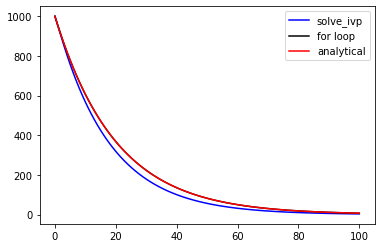

In [41]:
plt.plot(t, C, 'b-')
plt.plot(t, C_analytical, 'k-')
plt.plot(C_solver.t, C_solver.y[0], 'r-')
plt.legend(['solve_ivp', 'for loop', 'analytical'])

We can see that the analytical line and the `solve_ivp` line line up nearly perfectly.  So, we can use solve_ivp to define these functions.

## Exercise

Say you have 100 bacteria in an essentially infinite amount of growth media.  Solve the ODE for exponential growth, assuming that the rate of growth of bacteria is given by:

Growth rate $= dB$ where $d$ is a rate constant and $B$ the number of bacteria. Solve for $d$ of 1.39, .693 and .347.  (Hint: Use `args` in `solve_ivp` to make your life easier)

What is the doubling time of bacteria for each of these? To get this you can A) use the plot to estimate B) use the `events` argument to get the solver to give you the answer for the first doubling.